In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

In [4]:
path = "C:/Users/klove/OneDrive/바탕 화면/학교 활동/창업동아리/fordownload"
f = open(path + "\merge2.txt", 'r',encoding='utf-8')
line = f.readlines()
question = []
for i in range(len(line)):
    if line[i].endswith('?\n'):
        print(line[i],end="")
        question.append(line[i])


21. 다음 중 아래 시트에서 고급 필터 기능을 이용하여 수량이 전체 평균보다 크면서 거래일자가 1월 중인 데이터를 추출하려고 할 때, 고급필터의 조건식으로 옳은 것은?
22. 다음 중 데이터의 자동필터 기능에 대한 설명으로 옳지 않은 것은?
23. 다음 중 아래 그림과 같이 [B2:B5] 영역에 데이터 유효성 검사가 설정되어 있을 때 [B2:B5] 영역에 입력할 수 없는 값은?
24. 다음 중 피벗테이블에 대한 설명으로 옳지 않은 것은?
25. 다음 중 엑셀에서 날짜 데이터의 입력 방법을 설명한 것으로 옳지 않은 것은?
26. 다음 중 아래 시트와 같이 이름에 '철'이라는 글자가 포함된 셀의 서식을 채우기 색 ‘노랑’, 글꼴 스타일 ‘굵은 기울임꼴’로 변경하고자 한다. 이를 위해 [A2:A7] 영역에 설정한 조건부 서식의 수식 규칙으로 옳은 것은?
27. 다음 중 엑셀의 작업 환경 설정을 위한 [Excel 옵션]의 각 메뉴에 대한 설명으로 옳지 않은 것은?
28. 다음 중 셀 서식의 표시 형식 기호가 “\#,###;-\#,##0”으로 설정된 셀에 6345.678을 입력하였을 때의 표시 결과로 옳은 것은?
29. 다음 중 매크로 작성 시 지정하는 바로 가기 키에 대한 설명으로 옳은 것은?
30. 다음 중 아래에 주어진 매크로 모듈에 대한 설명으로 옳은 것은?
31. 다음 중 아래 시트에서 자격증 응시자에 대한 과목별 평균을 구하려고 할 때, [C11] 셀에 입력해야 할 배열 수식으로 옳은 것은?
32. 다음 중 아래 시트에서 [A4:B5] 영역을 선택한 후 수식 =A1:B2＋D1:E2를 입력하고 Ctrl＋ Shift＋ Enter 키를 눌렀을 때, [B5] 셀에 표시되는 값으로 옳은 것은?
33. 다음 중 아래 수식의 결과와 동일한 결과를 반환하는 수식으로 옳은 것은?
34. 다음 중 아래 시트에서 직위가 “부장”인 직원의 급여 평균을 [C10]셀에 구하는 배열 수식으로 옳은 것은?
35. 다음 중 Excel 2007의 리본 메뉴에 대한 설명으로 옳지 않은 것은

,q_mark
0,21. 다음 중 아래 시트에서 고급 필터 기능을 이용하여 수량이 전체 평균보다 크면...
1,22. 다음 중 데이터의 자동필터 기능에 대한 설명으로 옳지 않은 것은?\n
2,23. 다음 중 아래 그림과 같이 [B2:B5] 영역에 데이터 유효성 검사가 설정되...
3,24. 다음 중 피벗테이블에 대한 설명으로 옳지 않은 것은?\n
4,25. 다음 중 엑셀에서 날짜 데이터의 입력 방법을 설명한 것으로 옳지 않은 것은?\n


In [6]:
train_data = pd.DataFrame(question, columns=["q_mark"])
train_data.head(5)

,q_mark
0,21. 다음 중 아래 시트에서 고급 필터 기능을 이용하여 수량이 전체 평균보다 크면...
1,22. 다음 중 데이터의 자동필터 기능에 대한 설명으로 옳지 않은 것은?\n
2,23. 다음 중 아래 그림과 같이 [B2:B5] 영역에 데이터 유효성 검사가 설정되...
3,24. 다음 중 피벗테이블에 대한 설명으로 옳지 않은 것은?\n
4,25. 다음 중 엑셀에서 날짜 데이터의 입력 방법을 설명한 것으로 옳지 않은 것은?\n


In [7]:
train_data['q_mark'] = train_data['q_mark'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

In [8]:
train_data[:5]

,q_mark
0,다음 중 아래 시트에서 고급 필터 기능을 이용하여 수량이 전체 평균보다 크면서 거...
1,다음 중 데이터의 자동필터 기능에 대한 설명으로 옳지 않은 것은
2,다음 중 아래 그림과 같이 영역에 데이터 유효성 검사가 설정되어 있을 때 영역...
3,다음 중 피벗테이블에 대한 설명으로 옳지 않은 것은
4,다음 중 엑셀에서 날짜 데이터의 입력 방법을 설명한 것으로 옳지 않은 것은


In [9]:
korean_stopwords_path = 'C:/Users/klove/OneDrive/바탕 화면/학교 활동/창업동아리/data/stopwords.txt'

with open(korean_stopwords_path, encoding="UTF-8") as f:
    stopwords = f.readlines()

stopwords= [x.strip() for x in stopwords]
stopwords

['다음',
 '전체',
 '려고',
 '경우',
 '선택',
 '중',
 '채',
 '후',
 '를',
 '및',
 '의',
 '설명',
 '아래',
 '것',
 '은',
 '관',
 '전',
 '대한',
 '위',
 '워',
 '때',
 '이',
 '개',
 '상단',
 '오른쪽',
 '도록',
 '그림',
 '실행',
 '이용',
 '적용',
 '내용',
 '해당',
 '지정',
 '작업',
 '작성',
 '고자',
 '결과',
 '사용',
 '과정',
 '보기']

In [83]:
stopwords.append('안')
stopwords.append('별')
stopwords.append('액')
stopwords.append('각')
stopwords.append('년')
stopwords.append('가기')
stopwords.append('그')
stopwords.append('원')
stopwords.append('이면')
stopwords.append('점')
stopwords.append('바로')
stopwords.append('구')
stopwords.append('위해')



In [84]:
okt = Okt()
tokenized_data = []
for sentence in train_data['q_mark']:
    temp_X = okt.nouns(sentence) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    tokenized_data.append(temp_X)

질문의 최대 길이 : 26
질문의 평균 길이 : 5.1260794473229705


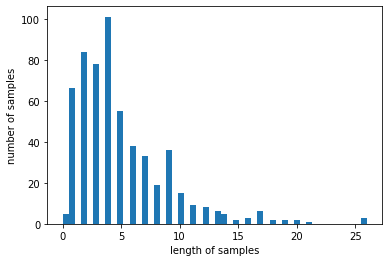

In [85]:
print('질문의 최대 길이 :',max(len(l) for l in tokenized_data))
print('질문의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(s) for s in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [86]:
from gensim.models import Word2Vec
model = Word2Vec(sentences = tokenized_data, window = 5, min_count = 3, workers = 4, sg = 0)

In [87]:
# 완성된 임베딩 매트릭스의 크기 확인
model.wv.vectors.shape

(220, 100)

In [88]:
print(model.wv.most_similar("셀"))


[('영역', 0.5764363408088684), ('데이터', 0.5517278909683228), ('조건', 0.5488643646240234), ('실적', 0.5484400391578674), ('시트', 0.5472043752670288), ('금액', 0.5386995673179626), ('페이지', 0.53139728307724), ('표시', 0.5201518535614014), ('값', 0.5057140588760376), ('부서', 0.5042475461959839)]


In [89]:
print(model.wv.most_similar("시나리오"))

[('조건', 0.35911181569099426), ('판매', 0.32829123735427856), ('말', 0.32194754481315613), ('순서대로', 0.2899802029132843), ('평균', 0.2868923246860504), ('표현', 0.2757820785045624), ('기호', 0.2756570279598236), ('도구', 0.2723521888256073), ('나열', 0.2636929452419281), ('서식', 0.25058838725090027)]


In [90]:
print(model.wv.most_similar("시트"))

[('값', 0.5918563604354858), ('영역', 0.5783296823501587), ('금액', 0.5519278645515442), ('셀', 0.5472044348716736), ('부', 0.5268517136573792), ('부서', 0.5249629020690918), ('설정', 0.5244202613830566), ('데이터', 0.5181101560592651), ('표시', 0.5052550435066223), ('조건', 0.5017566680908203)]
